# Biomedical Technology Project
# <ins>ML Models for survival prediction after breast cancer</ins>

## Include libraries and packets

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


## Load & visualize data

In [36]:
# Read csv file with breast cancer data
df = pd.read_csv("BRCA.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [37]:
df['Gender'].value_counts()

Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

C:\Users\spiro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


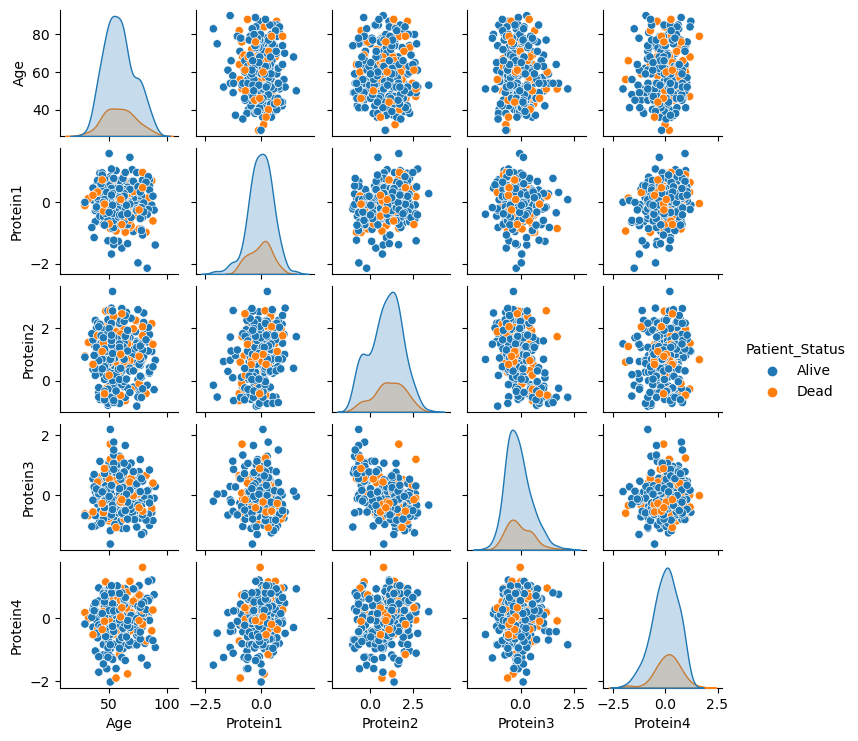

In [38]:
sns.pairplot(df, hue='Patient_Status', height=1.5)

## Data pre-processing

In [5]:
df = df.dropna() # Remove rows with missing values

In [6]:
df = df.drop(columns=['ER status', 'PR status']) # Remove columns of ER, PR status because all "Positive"

In [7]:
df = df.drop(df[df['Gender'] == 'MALE'].index)  # Remove males 

In [8]:
df = df.drop(columns='Gender')  # Remove Gender column (only females)

In [9]:
display(df)

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,TCGA-AR-A1AL,60.0,0.094585,1.00030,-0.22575,0.048602,III,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy,01-Nov-19,28-Feb-21,Dead
329,TCGA-AN-A04A,36.0,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
331,TCGA-A1-A0SG,61.0,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


## Visualize some of the features

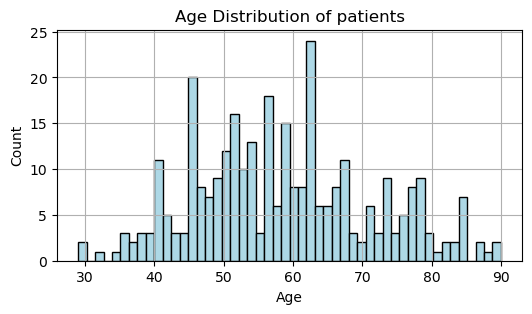

In [10]:
# Define figure size
plt.figure(figsize=(6, 3))  

# Plot age distribution in histogram
df['Age'].hist(bins = 50, grid = True, color='lightblue', edgecolor='black')

# Set labels and title
plt.xlabel(xlabel = "Age")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of patients")

# Show the plot
plt.show()

In [11]:
# Function for pie chart from Pandas dataframe
def plot_pie_chart(column, title):
    
    plt.figure(figsize=(6, 3))  
    # plotting data on chart
    plt.pie(df[column].value_counts(), labels=df[column].unique(), autopct='%.1f%%')

    plt.title(title)
    
    # displaying chart
    plt.show()
    


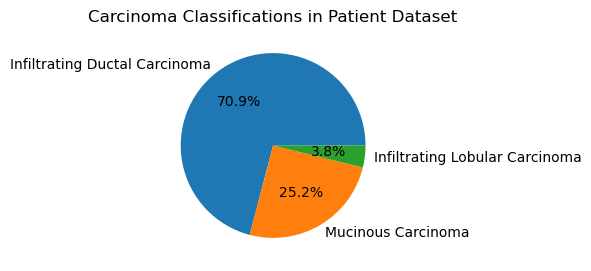

In [12]:
plot_pie_chart("Histology", "Carcinoma Classifications in Patient Dataset")

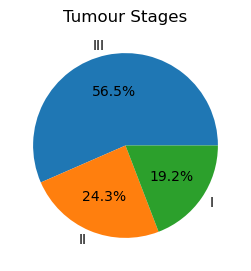

In [13]:
plot_pie_chart("Tumour_Stage", "Tumour Stages")

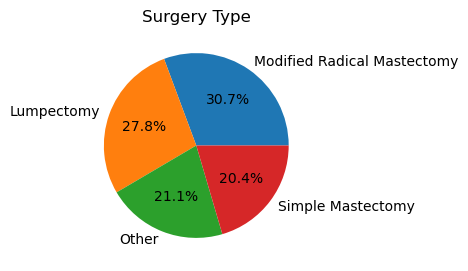

In [14]:
plot_pie_chart("Surgery_type", "Surgery Type")

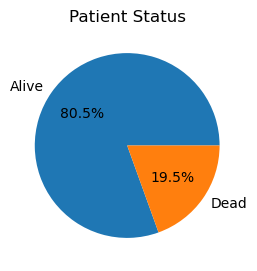

In [15]:
plot_pie_chart("Patient_Status", "Patient Status")

## Data transformation

In [16]:
# Map Inputs #

# Map tumour stage to numerical values
tumour_stage_map = {"I": 1, "II": 2, "III": 3}
df["Tumour_Stage"] = df["Tumour_Stage"].replace(tumour_stage_map)

# Map histology to numerical values
histology_map = {"Infiltrating Ductal Carcinoma": 1, "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3}
df["Histology"] = df["Histology"].replace(histology_map)

# Map HER2 status to numerical values
her2_map = {"Positive": 1, "Negative": 2}
df["HER2 status"] = df["HER2 status"].replace(her2_map)

# Map surgery type to numerical values
surgery_map = {"Other": 1, "Modified Radical Mastectomy": 2, "Lumpectomy": 3, "Simple Mastectomy": 4}
df["Surgery_type"] = df["Surgery_type"].replace(surgery_map)

In [17]:
# Map Outputs #

# Map patient status to numerical values
patient_status = {"Alive": 1, "Dead": 0}
df["Patient_Status"] = df["Patient_Status"].replace(patient_status)

In [18]:
# Columns to normalize
columns_to_normalize = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

# Apply Min-Max scaling to specific columns
scaler = MinMaxScaler(feature_range=(0,1))
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [19]:
display(df)

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0.595194,0.320733,0.569135,0.628982,3,1,2,2,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,0.461259,0.355358,0.586754,0.545493,2,3,2,3,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,0.630940,0.522750,0.340225,0.490026,3,1,2,1,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,0.666013,0.175136,0.375408,0.588108,2,1,2,2,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,0.632965,0.658657,0.562147,0.468761,2,1,2,1,06-May-17,27-Jun-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,TCGA-AR-A1AL,60.0,0.599001,0.451737,0.366847,0.567408,3,1,2,4,01-Nov-19,28-Feb-21,0
329,TCGA-AN-A04A,36.0,0.635707,0.364482,0.279944,0.412581,3,1,1,4,11-Nov-19,09-Feb-20,0
331,TCGA-A1-A0SG,61.0,0.381234,0.805133,0.386610,0.647037,2,1,2,3,11-Nov-19,18-Jan-21,0
332,TCGA-A2-A0EU,79.0,0.701942,0.692691,0.286861,0.502550,1,1,1,3,21-Nov-19,19-Feb-21,0


In [20]:
df.shape

(313, 13)

##  Training/Test split

In [21]:
X = np.array(df[['Age', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']])
y = np.array(df[['Patient_Status']])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [22]:
y_train = y_train.ravel() # Convert y_train to 1D array for model

## Create 2 ML classification models and evaluate them in testing set


<b> Algorithm (i) (Support Vector Machine) 

In [23]:
# Define SVM model and hyperparameters to tune
svc = SVC()
svc.fit(X_train, np.array(y_train))

SVC()

<b> Evaluation of Algorithm (i) (Support Vector Machine) 

In [24]:
y_predSVC = svc.predict(X_test)
accuracySVC = accuracy_score(y_test, y_predSVC)

print(f'Accuracy SVC: {accuracySVC * 100:.2f}%')

Accuracy SVC: 80.85%


In [25]:
# Pick a random patient and predict 
patient = [[56.0, 0.666013, 0.175136, 0.375408, 0.588108, 2, 1, 2, 2]] # Alive

prediction = svc.predict(patient)

if prediction == 1:
    print('Alive')
elif prediction == 0:
    print('Dead')

Alive


<b>Algorithm (ii) (Decision Tree)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

 <b>Evaluation of algorithm (ii) (Decision Tree)

In [33]:
y_predDT = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_predDT)

print(f'Accuracy DT: {accuracy * 100:.2f}%') 

Accuracy DT: 85.11%


In [34]:
# Pick a random patient and predict 
patient = [[56.0, 0.666013, 0.175136, 0.375408, 0.588108, 2, 1, 2, 2]] # Alive

prediction = dt.predict(patient)

if prediction == 1:
    print('Alive')
elif prediction == 0:
    print('Dead')

Alive
